# Linear Regression

### Q1

In [362]:
import numpy as np
import math
import operator
from scipy.linalg import svd
import scipy.stats as ss
import matplotlib.pyplot as plt
import scipy.linalg as la

x = np.array([[-2], [-5], [-3], [0], [-8], [-2], [1], [5], [-1], [6]])
y = np.array([[1], [-4], [1], [3], [11], [5], [0], [-1], [-3], [1]])

def lse_1(x,y):
    biasF = np.ones(((len(x)), 1))
    X = np.hstack((biasF, x))

    w = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)

    return w
    

w = lse_1(x,y)

Y = np.zeros(shape=(10,1))

for j in range(len(y)):
    Y[j] = (w[1]*x[j] + w[0])

print("Y_pred: \n", Y)

def rmse(predictions, targets):
    return np.sqrt(np.mean((predictions-targets)**2))

rootmean = rmse(Y, y)
print("RMSE: ", rmse(Y, y))


Y_pred: 
 [[ 1.85394655]
 [ 3.0919826 ]
 [ 2.26662523]
 [ 1.02858919]
 [ 4.33001865]
 [ 1.85394655]
 [ 0.6159105 ]
 [-1.03480423]
 [ 1.44126787]
 [-1.44748291]]
RMSE:  3.7013259176662716


### Q2

Converged at Epoch:  18
At w1 = 0.07692293618911292, w2 = -0.3846146809455646, J = 5.8111496830407836e-11


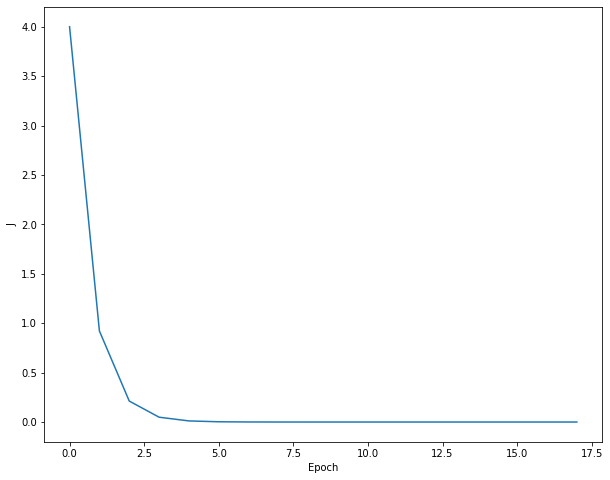

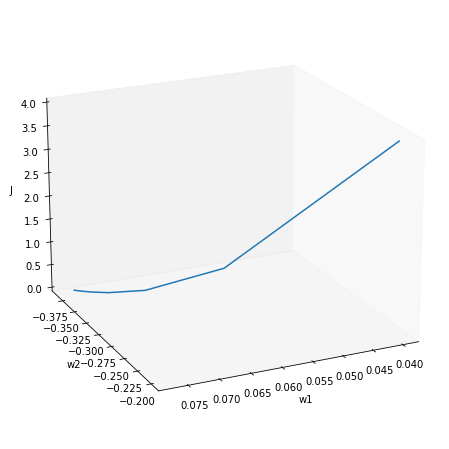

In [447]:
from mpl_toolkits.mplot3d import Axes3D

w1 = 0
w2 = 0
J = 0

w1_arr = []
w2_arr = []
J_arr = []
epoch_arr = []

l_rate = 0.01
precision = 2**-32
step_size_w1 = 1
step_size_w2 = 1
step_size_J = 1
max_iters = 10000
epoch = 0

dfw1 = lambda w_1, w_2: 2*w_1 - 10*w_2 - 4
dfw2 = lambda w_1, w_2: -10*w_1 + 50*w_2 + 20
J_func = lambda w_1, w_2: (w_1 - 5*w_2 - 2)**2

while step_size_J > precision:
    prev_w1 = w1
    prev_w2 = w2

    prev_J = J

    w1 = w1 - l_rate * dfw1(prev_w1, prev_w2)
    w2 = w2 - l_rate * dfw2(prev_w1, prev_w2)
    J = J_func(prev_w1, prev_w2)

    w1_arr.append(w1)
    w2_arr.append(w2)
    J_arr.append(J)
    epoch_arr.append(epoch)

    step_size_J = abs(J - prev_J)

    epoch = epoch + 1


print("Converged at Epoch: ", epoch)
print("At w1 = {0}, w2 = {1}, J = {2}".format(w1, w2, J))

w1_arr = np.array(w1_arr)
w2_arr = np.array(w2_arr)
J_arr = np.array(J_arr)
epoch_arr = np.array(epoch_arr)

plt.plot(epoch_arr, J_arr)
plt.xlabel("Epoch")
plt.ylabel("J")
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 65)
ax.set_xlabel("w1")
ax.set_ylabel("w2")
ax.set_zlabel("J")
ax.grid(False)
plt.rcParams["figure.figsize"] = (10,8)
ax.plot(w1_arr, w2_arr, J_arr)



### Q3

In [448]:
import cv2
from cv2 import VideoWriter, VideoWriter_fourcc
import matplotlib.cm as cm
from collections import Counter
import glob
from matplotlib.image import imread
from enum import Enum


class Sex(Enum):
    male = 1
    female = 2

class Smoker(Enum):
    no = 1
    yes = 2
    
class Region(Enum):
    southwest = 1
    southeast = 2
    northwest = 3
    northeast = 4


np.random.seed(0)
imp_data = np.genfromtxt('insurance.csv', delimiter=',', encoding='utf8', dtype=np.str)
# dataN = data.astype(np.float)

# Separates header and data
feature_name, data = np.vsplit(imp_data, [1])

# x, y = np.hsplit(data, [-1])

n = len(data)

# Rows shuffled
np.random.shuffle(data)

# Calculates array index for splitting
spltIdx = int((2/3)*n)

# Training-validation data split
data_train, data_test = data[:spltIdx,:], data[spltIdx:,:]

# Training data
x_tr, y_tr = np.hsplit(data_train, [-1])
# Testing Data
x_tt, y_tt = np.hsplit(data_test, [-1])

def preprocessCat(dataMain):
    '''Changes categorical features to enumerated ones'''
    
    data = np.copy(dataMain)

    for i in range(len(data)):
        for s in Sex:
            if s.name == data[i][1]:
                data[i][1] = s.value
                break
        
        for sm in Smoker:
            if sm.name == data[i][4]:
                data[i][4] = sm.value
                break

        for r in Region:
            if r.name == data[i][5]:
                data[i][5] = r.value
                break

    return data

def preprocessBin(dataMain):
    '''Changes categorical features to binary features'''
    
    data = np.copy(dataMain)
    binCols = np.ones(((len(data)), 4))
    data = np.hstack((data, binCols))

    for i in range(len(data)):
        for s in Sex:
            if s.name == data[i][1]:
                data[i][1] = s.value
                break
        
        for sm in Smoker:
            if sm.name == data[i][4]:
                data[i][4] = sm.value
                break


        if data[i][5] == 'southwest':
            data[i][6] = 2
        elif data[i][5] == 'southeast':
            data[i][7] = 2
        elif data[i][5] == 'northwest':
            data[i][8] = 2
        elif data[i][5] == 'northeast':
            data[i][9] = 2

    data = np.delete(data, 5, 1)
    return data


def lse(x,y, addBias, isBin):
    '''Calculates weights using LSE'''

    x = x.astype(np.float64)
    y = y.astype(np.float64)

    if addBias:
        biasF = np.ones(((len(x)), 1))
        x = np.hstack((biasF, x))

    if isBin:
        w = np.linalg.pinv(x.transpose().dot(x)).dot(x.transpose()).dot(y)
    else:
        w = np.linalg.inv(x.transpose().dot(x)).dot(x.transpose()).dot(y)

    return w

def noiseGen(data):
    '''Adds noise to data'''
    
    data = data.astype(np.float64)
    noise = np.random.normal(0, .01, data.shape)

    data = data + noise
    return data


def rmse(w, x, y):
    x = x.astype(np.float64)
    y = y.astype(np.float64)

    b0 = w[0]
    other = w[1:]
    prediction = b0

    Y = np.zeros(shape=(y.shape))

    for j in range(len(y)):
        prediction = 0
        prediction += b0

        for i in range(len(other)):
            prediction += other[i] * x[j][i]

        Y[j] = prediction

    return np.sqrt(np.mean((Y-y)**2))




# Change categorical features to enumerated ones (NO BIAS)
d_tr_preC = preprocessCat(x_tr)
w_tr_preC = lse(d_tr_preC, y_tr, False, False)
rmse_tr_preC = rmse(w_tr_preC, d_tr_preC, y_tr)
print("RMSE (TRAINING - ENUM - NO BIAS): ", rmse_tr_preC)

d_tt_preC = preprocessCat(x_tt)
w_tt_preC = lse(d_tt_preC, y_tt, False, False)
rmse_tt_preC = rmse(w_tt_preC, d_tt_preC, y_tt)
print("RMSE (TESTING - ENUM - NO BIAS): ", rmse_tt_preC)

print()

# Change categorical features to enumerated ones (BIAS)
d_tr_preC = preprocessCat(x_tr)
w_tr_preC = lse(d_tr_preC, y_tr, True, False)
rmse_tr_preC = rmse(w_tr_preC, d_tr_preC, y_tr)
print("RMSE (TRAINING - ENUM - BIAS): ", rmse_tr_preC)

d_tt_preC = preprocessCat(x_tt)
w_tt_preC = lse(d_tt_preC, y_tt, True, False)
rmse_tt_preC = rmse(w_tt_preC, d_tt_preC, y_tt)
print("RMSE (TESTING - ENUM - BIAS): ", rmse_tt_preC)

print()
print()

# Change categorical features to binary features (NO BIAS)
d_tr_preC = preprocessBin(x_tr)
d_tr_preC = noiseGen(d_tr_preC)
w_tr_preC = lse(d_tr_preC, y_tr, False, True)
rmse_tr_preC = rmse(w_tr_preC, d_tr_preC, y_tr)
print("RMSE (TRAINING - BIN - NO BIAS): ", rmse_tr_preC)


d_tt_preC = preprocessBin(x_tt)
d_tt_preC = noiseGen(d_tt_preC)
w_tt_preC = lse(d_tt_preC, y_tt, False, True)
rmse_tt_preC = rmse(w_tt_preC, d_tt_preC, y_tt)
print("RMSE (TESTING - BIN - NO BIAS): ", rmse_tt_preC)

print()

# # Change categorical features to binary features (BIAS)
d_tr_preC = preprocessBin(x_tr)
d_tr_preC = noiseGen(d_tr_preC)
w_tr_preC = lse(d_tr_preC, y_tr, True, True)
rmse_tr_preC = rmse(w_tr_preC, d_tr_preC, y_tr)
print("RMSE (TRAINING - BIN - BIAS): ", rmse_tr_preC)


d_tt_preC = preprocessBin(x_tt)
d_tt_preC = noiseGen(d_tt_preC)
w_tt_preC = lse(d_tt_preC, y_tt, True, True)
rmse_tt_preC = rmse(w_tt_preC, d_tt_preC, y_tt)
print("RMSE (TESTING - BIN - BIAS): ", rmse_tt_preC)




RMSE (TRAINING - ENUM - NO BIAS):  151357.23969016664
RMSE (TESTING - ENUM - NO BIAS):  181121.86523476854

RMSE (TRAINING - ENUM - BIAS):  5757.954440690525
RMSE (TESTING - ENUM - BIAS):  6519.373997851638


RMSE (TRAINING - BIN - NO BIAS):  31707.42718070179
RMSE (TESTING - BIN - NO BIAS):  31434.144622561682

RMSE (TRAINING - BIN - BIAS):  5763.9397804300825
RMSE (TESTING - BIN - BIAS):  6502.067257403235
